In [1]:
import os
import pickle

import numpy as np

In [4]:
## 第一章 python入门
### 1.5 numpy
x = np.array([1.0,2.0,3.0])
type(x)

numpy.ndarray

In [6]:
y = np.array([2.0,4.0,6.0])
x+y,x-y,x/y


(array([3., 6., 9.]), array([-1., -2., -3.]), array([0.5, 0.5, 0.5]))

In [7]:
z = np.array([3.0,6.])
x+z
#x,y元素个数不一样，会报错

ValueError: operands could not be broadcast together with shapes (3,) (2,) 

In [8]:
x/2

array([0.5, 1. , 1.5])

In [17]:
A = np.array([[1,2],[3,4]])
A.shape

(2, 2)

In [10]:
A.dtype

dtype('int64')

In [20]:
B = np.array([[3,0],[0,6]])
A*B

array([[ 3,  0],
       [ 0, 24]])

In [21]:
#广播机制 不同维度的也能进行运算
A=np.array([[1,2],[3,4]])
B = np.array([10,20])
A*B

array([[10, 40],
       [30, 80]])

In [24]:
X= np.array([[51,55],[14,19],[0,4]])
X[0],X[0].dtype,type(X[0]),X[0].shape

(array([51, 55]), dtype('int64'), numpy.ndarray, (2,))

In [25]:
for row in X:
    print(row)

[51 55]
[14 19]
[0 4]


In [26]:
#通过索引访问
X[np.array([0,1])]

array([[51, 55],
       [14, 19]])

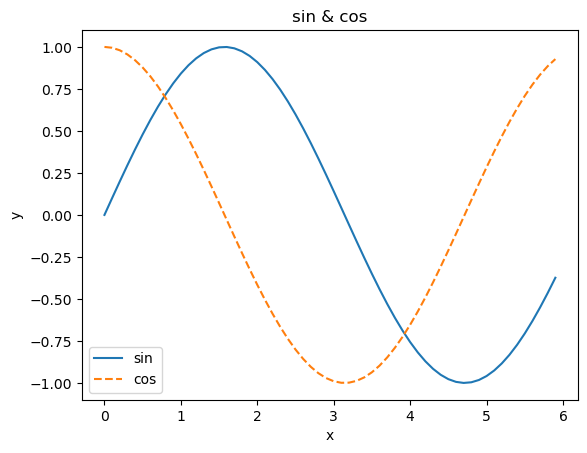

In [31]:
import matplotlib.pyplot as plt
x = np.arange(0,6,0.1)
y1 = np.sin(x)
y2 = np.cos(x)
plt.plot(x,y1,label='sin')
plt.plot(x,y2,linestyle='--',label='cos')
plt.xlabel('x')
plt.ylabel('y')
plt.title('sin & cos')
plt.legend()
plt.show()

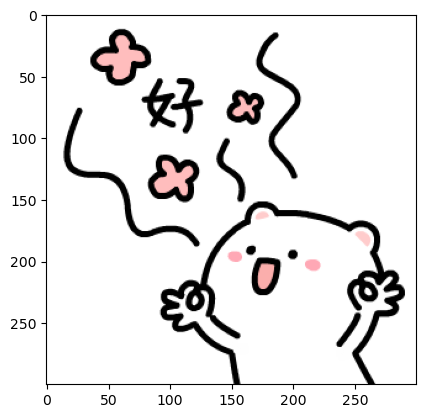

In [42]:
from matplotlib.image import imread
img = imread('./image/lena.png')
plt.imshow(img)

plt.show()

In [44]:
## 第二章 感知机
### 感知机的实现(与门的实现)
def AND(x1,x2):
    w1,w2,theta = 0.5,0.5,0.7
    tmp = w1*x1+w2*x2
    if tmp<= theta:
        return 0
    else:
        return 1
AND(0,0),AND(0,1),AND(1,0),AND(1,1)

(0, 0, 0, 1)

In [46]:
### 使用numpy来实现
x = np.array([0,1])      #输入
w = np.array([0.5,0.5]) # 权重
b = -0.7 # 偏置
w*x,np.sum(w*x),np.sum(w*x)+b

(array([0. , 0.5]), 0.5, -0.19999999999999996)

In [47]:
def AND(x1,x2):
    x=np.array([x1,x2])
    w=np.array([0.5,0.5])
    b = -0.7
    if np.sum(w*x)+b<0:
        return 0
    else:
        return 1
AND(0,0),AND(0,1),AND(1,0),AND(1,1)

(0, 0, 0, 1)

In [ ]:
### 感知机无法实现异或门
### 通过多次结构的神经网络来实现

## 第三章 神经网络
### 3.2 激活函数
+ 感知机中流动的是二元信号，而神经网络中流动的是连续的实数值信号
+ 神经网络中的激活函数必须时候用非线性函数，因为使用线性函数，加深神经网络的层数是没有意义的
#### 3.2.1 sigmoid 函数
$$
y=\frac{1}{1+exp(-x)}
$$


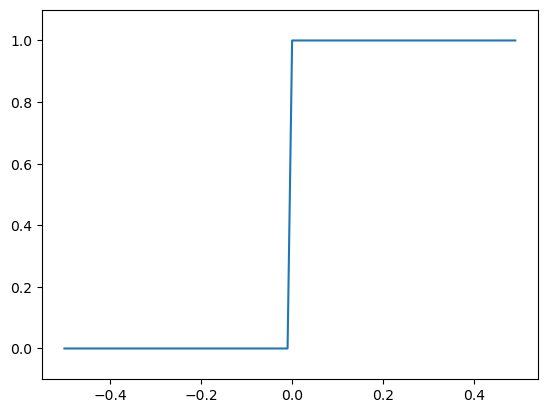

In [3]:
#普通阶跃函数
import numpy as np
import matplotlib.pylab as plt

def step_function(x):
    return np.array(x>0,dtype=np.int64)

x = np.arange(-0.5,0.5,0.01)
y = step_function(x)
plt.plot(x,y)
plt.ylim(-0.1,1.1)
plt.show()

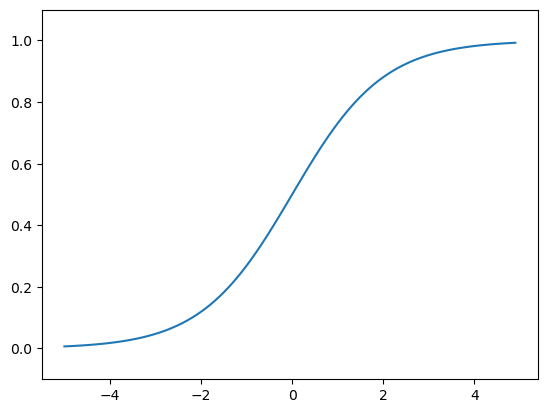

In [5]:
#sigmoid函数实现
def sigmoid(x):
    return 1/(1+np.exp(-x))

x = np.arange(-5.0,5.0,0.1)
y = sigmoid(x)
plt.plot(x,y)
plt.ylim(-0.1,1.1)
plt.show()

#### 3.2.2 ReLu函数
$$
h(x)=
\left\{
\begin{aligned}
0 (x<=0)\\
x (x>0)
\end{aligned}
\right.
$$

In [ ]:
def relu(x):
    return np.maximum(0,x)

### 3.3 多维数组的运算

In [10]:
# 数组的维数 和 shape
A = np.array([1,2,3,4])
np.ndim(A)#1
np.shape(A)# 返回的是一个元组
B = np.array([[1,2],[3,4],[5,6]])
np.ndim(B)#2
np.shape(B)# (3,2) 3行row 2列column

(3, 2)

In [11]:
# 点积 dot
A = np.array([[1,2],[3,4]])
B = np.array([[1,2,3],[3,4,5]])
np.dot(A,B)

array([[ 7, 10, 13],
       [15, 22, 29]])

#### 3.3.1神经网络的内积

$$
 X W=Y
$$
### 3.4 三层神经网络的实现
$w_{12}^{(1)}$ 1代表后一层的第一个神经元 2代表前一层的第2个神经元(1)代表为第一层的权重
因此可以得到
$$
a_1^{(1)} = w_{11}^{(1)}x_1+w_{12}^{(1)}x_2+b_1^{(1)}
$$
对于第一层，就有
$$
 A^{(1)} = XW^{(1)}+B^{(1)}
$$
+ 机器学习的问题大致可以分为分类问题和回归问题，分类例如图像识别，回归问题是预测
+ 输出层的恒等函数和softmax函数，softmax函数如下
$$
 y_k = \frac{exp(a_k)}{\sum_{i=1}^{n}exp(a_i)}
$$
+ softmax函数的总和输出为1，可以将其理解为概率，概率高的为其类别


In [4]:
import numpy as np
X = np.array([1,2])
X.shape
W = np.array([[1,3,5],[2,4,6]])
Y = np.dot(X,W)
Y

array([ 5, 11, 17])

In [6]:
X = np.array([1.0,0.5])
W1 = np.array([[0.1,0.3,0.5],[0.2,0.4,0.6]])
B1 = np.array([0.1,0.2,0.3])
print(W1.shape)
print(X.shape)
print(B1.shape)

(2, 3)
(2,)
(3,)


In [8]:
A1 = np.dot(X,W1)+B1
A1

array([0.3, 0.7, 1.1])

In [9]:
#使用激活函数 sigmoid
def sigmoid(x):
    return 1/(1+np.exp(-x))
Z1 = sigmoid(A1)
Z1

array([0.57444252, 0.66818777, 0.75026011])

In [11]:
# 第一层到第二层的信号传递
W2 = np.array([[0.1,0.4],[0.2,0.5],[0.3,0.6]])
B2 = np.array([0.1,0.2])

A2 = np.dot(Z1,W2)+B2
Z2 = sigmoid(A2)
Z2

array([0.62624937, 0.7710107 ])

In [12]:
#定义恒等函数，由于是输出层，区别于h(x),只是为了保持统一
def indentify_function(x):
    return x
W3 = np.array(([0.1,0.3],[0.2,0.4]))
B3 = np.array([0.1,0.2])
A3 = np.dot(Z2,W3)+B3
Y = indentify_function(A3)
Y

array([0.31682708, 0.69627909])

In [14]:
# softmax函数的实现
def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a/sum_exp_a
    return y
# softmax在计算时，由于a可能很大，所以可能有溢出的风险，因此计算时可以弄一个常数

a = np.array([0.3,2.9,4.0])
y = softmax(a)
print(y)
np.sum(y)

[0.01821127 0.24519181 0.73659691]


1.0

### 3.6 手写数字识别
+ 机器学习分为学习和推理，前者进行权重参数的学习，后者使用学习到的参数对数据进行分类
+ MNIST数据集 训练图像和测试图像
+ 图像数据是28*28的灰度图像
+ 输入层是784个神经元，输出层是10个神经元，两个隐藏层  一个50个神经元 一个100个神经元

In [15]:
import sys,os
sys.path.append(os.pardir)#获取当前目录的父目录
from dataset.mnist import load_mnist
(x_train,t_train),(x_test,t_test) = load_mnist(flatten=True,normalize=False)
x_train.shape

(60000, 784)

In [29]:
# 显示图像
import sys ,os
sys.path.append(os.pardir)
import numpy as np
import pickle
from dataset.mnist import load_mnist
from PIL import Image

def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()
(x_train,t_train),(x_test,t_test) = load_mnist(flatten=True,normalize=False)
# flatten为True表示读入是以一位数组的形式读的  需要转化为28*28的形式才能够显示
img = x_train[0]
label = t_train[0]
print(label)
print(img.shape)
img = img.reshape(28,28)
print(img.shape)
img_show(img)

5
(784,)
(28, 28)


In [34]:
def getdata():
    (x_train,t_train),(x_test,t_test) = load_mnist(flatten=True,normalize=True,one_hot_label=False)
    return x_test,t_test
def init_network():
    with open("./dataset/sample_weight.pkl",'rb') as f:#权重参数文件
        network = pickle.load(f)
    return network
def predict(network,x):
    W1,W2,W3 = network["W1"],network["W2"],network["W3"]
    b1,b2,b3 = network["b1"],network["b2"],network["b3"]
    a1 = np.dot(x,W1)+b1
    Z1 = sigmoid(a1)
    a2 = np.dot(Z1,W2)+b2
    Z2 = sigmoid(a2)
    a3 = np.dot(Z2,W3)+b3
    y = softmax(a3)
    return y
print(os.getcwd())

/Users/jiuzii/programming_learning/l2.deeplearning/scratch


In [35]:
x,t = getdata()
print(len(x))
network = init_network()
accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network,x[i])
    p = np.argmax(y)# 获取概率最高的元素的索引
    if p==t[i]:
        accuracy_cnt += 1
print("Accuracy:"+str(float(accuracy_cnt)/len(x)))


10000
Accuracy:0.9352


In [37]:
#可以看到输入是一维的，第一个权重的是784*50 （1*784）*（784*50）
x[0].shape
network["W1"].shape

(784, 50)

In [38]:
#我们可以批量处理100张图片（100*784）*（784*50）
x,t = getdata()
network = init_network()
batch_size = 100
accuracy_cnt = 0
for i in range(0,len(x),batch_size):
    x_batch = x[i:i+batch_size]
    y_batch = predict(network,x_batch)
    p = np.argmax(y_batch,axis=1)
    accuracy_cnt += np.sum(p==t[i:i+batch_size])
print("Accuracy:"+str(float(accuracy_cnt)/len(x)))

Accuracy:0.9352
